In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
#heart_data = pd.read_csv('hrtData1.csv')
#heart_data = sample_data.sample(n=1000, random_state=42)

In [3]:
#Reading the dataset from a csv file

df= pd.read_csv('heart_disease_dataset_1.csv')
#heartData = allData.sample(n = 5000, random_state = 42) #choosing 50000 random data points
minority_class = df[df['target'] == 0]
majority_class = df[df['target'] == 1]

# Check the number of instances in each class
n_minority = len(minority_class)
n_majority = len(majority_class)

# We need 2500 instances of each class
n_required = 2500

# Oversample the minority class using resample if the minority class is less than 2500
if n_minority < n_required:
    minority_class_oversampled = resample(minority_class,
                                          replace=True,    # Sample with replacement
                                          n_samples=n_required, # Number of samples to match the majority class
                                          random_state=42)  # Seed for reproducibility
else:
    minority_class_oversampled = minority_class.sample(n=n_required, random_state=42)

# Randomly sample the majority class
majority_class_sampled = majority_class.sample(n=n_required, random_state=42)

# Combine the oversampled minority class with the sampled majority class
balanced_df = pd.concat([minority_class_oversampled, majority_class_sampled])

# Shuffle the resulting dataset
heart_data = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# The resulting dataset balanced_df now contains 5000 instances with an equal number of 0s and 1s
print(heart_data['target'].value_counts())

target
0    2500
1    2500
Name: count, dtype: int64


In [4]:
heart_data.shape

(5000, 17)

C:\Users\hp\AppData\Local\Temp\ipykernel_14032\1910254216.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart_data, palette='viridis')


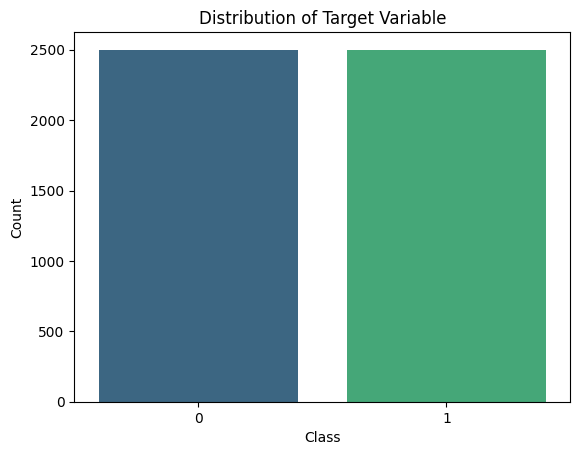

In [5]:
sns.countplot(x='target', data=heart_data, palette='viridis')
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [6]:
#x= heart_data[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'PhysActivity', 'AlcoholDrinking', 'PhysHlth', 'DiffWalk', 'Age' ]]

#y= heart_data['target']

In [6]:
y= heart_data['target']
x= heart_data.drop('target', axis= 1)

In [8]:
heart_data

,HighBP,HighChol,BMI,Smoker,Stroke,PhysActivity,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Sex,Age,SleepTime,SkinCancer,Asthma,KidneyDisease,target
0,0,1,36,1,0,1,0,3,2,0,0,6,6,0,0,0,0
1,0,0,33,0,0,1,1,2,0,0,0,13,8,0,0,0,1
2,1,1,29,1,1,0,1,4,2,0,1,11,7,0,0,0,1
3,1,0,27,1,0,1,1,2,0,0,0,9,5,0,0,0,0
4,0,1,22,0,0,1,1,2,0,0,0,9,20,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,25,1,0,1,1,2,0,0,1,13,8,0,0,0,1
4996,0,0,27,0,0,1,1,3,3,0,1,5,5,0,0,0,0
4997,1,1,43,0,0,0,1,3,0,0,0,10,4,0,0,0,1
4998,1,1,41,0,1,0,1,4,25,1,0,8,5,0,0,0,1


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# SVM

In [8]:
from sklearn.svm import SVC
svm_model1= SVC()
svm_model1.fit(x_train, y_train)

SVC()

In [9]:
y_train_pred_svc= svm_model1.predict(x_train)
#make predection on the test set
y_test_pred_svc = svm_model1.predict(x_test)

In [10]:
train_accuracy_svc = accuracy_score(y_train, y_train_pred_svc)
train_precision_svc = precision_score(y_train, y_train_pred_svc)
train_recall_svc = recall_score(y_train, y_train_pred_svc)
train_f1_svc = f1_score(y_train, y_train_pred_svc)

test_accuracy_svc = accuracy_score(y_test, y_test_pred_svc)
test_precision_svc = precision_score(y_test, y_test_pred_svc)
test_recall_svc = recall_score(y_test, y_test_pred_svc)
test_f1_svc = f1_score(y_test, y_test_pred_svc)

In [11]:
print(f"Training Data Accuracy: {train_accuracy_svc}")
print(f"Training Data Precision: {train_precision_svc}")
print(f"Training Data Recall: {train_recall_svc}")
print(f"Training Data F1 Score: {train_f1_svc}")

print(f"Test Data Accuracy: {test_accuracy_svc}")
print(f"Test Data Precision: {test_precision_svc}")
print(f"Test Data Recall: {test_recall_svc}")
print(f"Test Data F1 Score: {test_f1_svc}")

Training Data Accuracy: 0.75575
Training Data Precision: 0.7203352448169387
Training Data Recall: 0.826417004048583
Training Data F1 Score: 0.7697383926467122
Test Data Accuracy: 0.775
Test Data Precision: 0.7462932454695222
Test Data Recall: 0.8645038167938931
Test Data F1 Score: 0.8010610079575596


In [14]:
inputData = (1,1,22,0,1,0,1,3,0,1,0,12,8,0,0,0)


#changing the input data into a numpy array

input_as_np = np.asarray(inputData)

#reshaping the arrayas we are predicting for one instance
input_reshaped = input_as_np.reshape(1,-1)

#standardise the input data

#std_data =  scaler.transform(input_reshaped)
#print(std_data)


prediction = svm_model1.predict(input_reshaped)
print(prediction)


if((prediction == 0)):
    print("The person does not have heart disease")
else:
    print("The person have heart disease.")

[1]
The person have heart disease.


C:\Users\hp\.conda\envs\sandy\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [15]:
import pickle

# Assuming you have a trained model named `nb_model`
# Train your model (example)
# nb_model.fit(X_train, y_train)

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(svm_model1, file)


In [1]:
from flask import Flask, request, render_template
import pickle

app = Flask(__name__)

# Load your machine learning model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Extract input data from form
    HighBP = int(request.form['HighBP'])
    HighChol = int(request.form['HighChol'])
    BMI = float(request.form['BMI'])
    Smoker = int(request.form['Smoker'])
    Stroke = int(request.form['Stroke'])
    PhysActivity = int(request.form['PhysActivity'])
    AnyHealthcare = int(request.form['AnyHealthcare'])
    GenHlth = int(request.form['GenHlth'])
    PhysHlth = int(request.form['PhysHlth'])
    DiffWalk = int(request.form['DiffWalk'])
    Sex = int(request.form['Sex'])
    Age = int(request.form['Age'])
    SleepTime = int(request.form['SleepTime'])
    SkinCancer = int(request.form['SkinCancer'])
    Asthma = int(request.form['Asthma'])
    KidneyDisease = int(request.form['KidneyDisease'])
    
    # Create input array
    input_data = np.array([HighBP, HighChol, BMI, Smoker, Stroke, PhysActivity, AnyHealthcare,
                           GenHlth, PhysHlth, DiffWalk, Sex, Age, SleepTime, SkinCancer, Asthma, KidneyDisease])
    input_reshaped = input_data.reshape(1, -1)

    # Predict using the loaded model
    prediction = svm_model1.predict(input_reshaped)

    result = "The person does not have heart disease" if prediction[0] == 0 else "The person has heart disease"

    return render_template('disease.html', prediction=result)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
